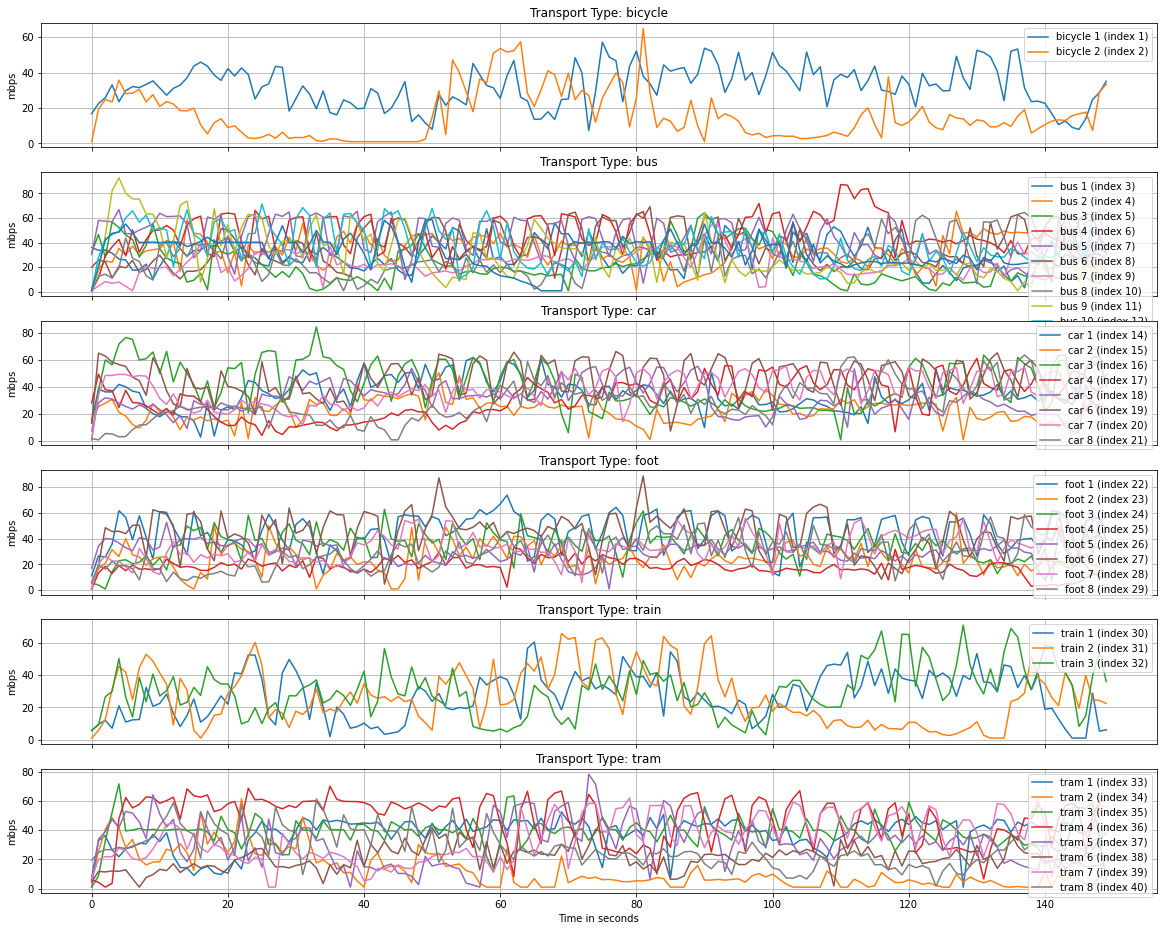

In [4]:
# Load traces.csv and plot the traces
import os
import pandas as pd
import matplotlib.pyplot as plt

log_directory = './traces/'

# Load the CSV data into a DataFrame without specifying column names
df = pd.read_csv('traces.csv', header=None)

x = df.columns.to_numpy()

# Group log files by transport type (e.g., bicycle, bus)
transport_groups = {}
with os.scandir(log_directory) as it:
    for i, entry in enumerate(sorted(it, key=lambda entry: entry.name)):
        transport_type = entry.name.split('_')[1]  # Extract the transport type
        if transport_type not in transport_groups:
            transport_groups[transport_type] = []
        transport_groups[transport_type].append(i + 1)

# Create subplots for each transport category
fig, axes = plt.subplots(len(transport_groups), 1, figsize=(20, 16), sharex=True)

# Load and plot data for each transport category
for i, (transport_type, indices) in enumerate(transport_groups.items()):
    for j in range(len(df)):
        if j not in indices:
            continue
        y = df.loc[j].to_numpy()
        # Divide by 1e6 to convert from bits to megabits
        y = y / 1e6
        axes[i].plot(x, y, label=f'{transport_type} {indices.index(j) + 1} (index {j})')

    axes[i].set_title(f'Transport Type: {transport_type}')
    axes[i].set_ylabel('mbps')
    axes[i].grid(True)
    axes[i].legend(loc='upper right')
plt.xlabel('Time in seconds')
plt.grid(True)
plt.show()


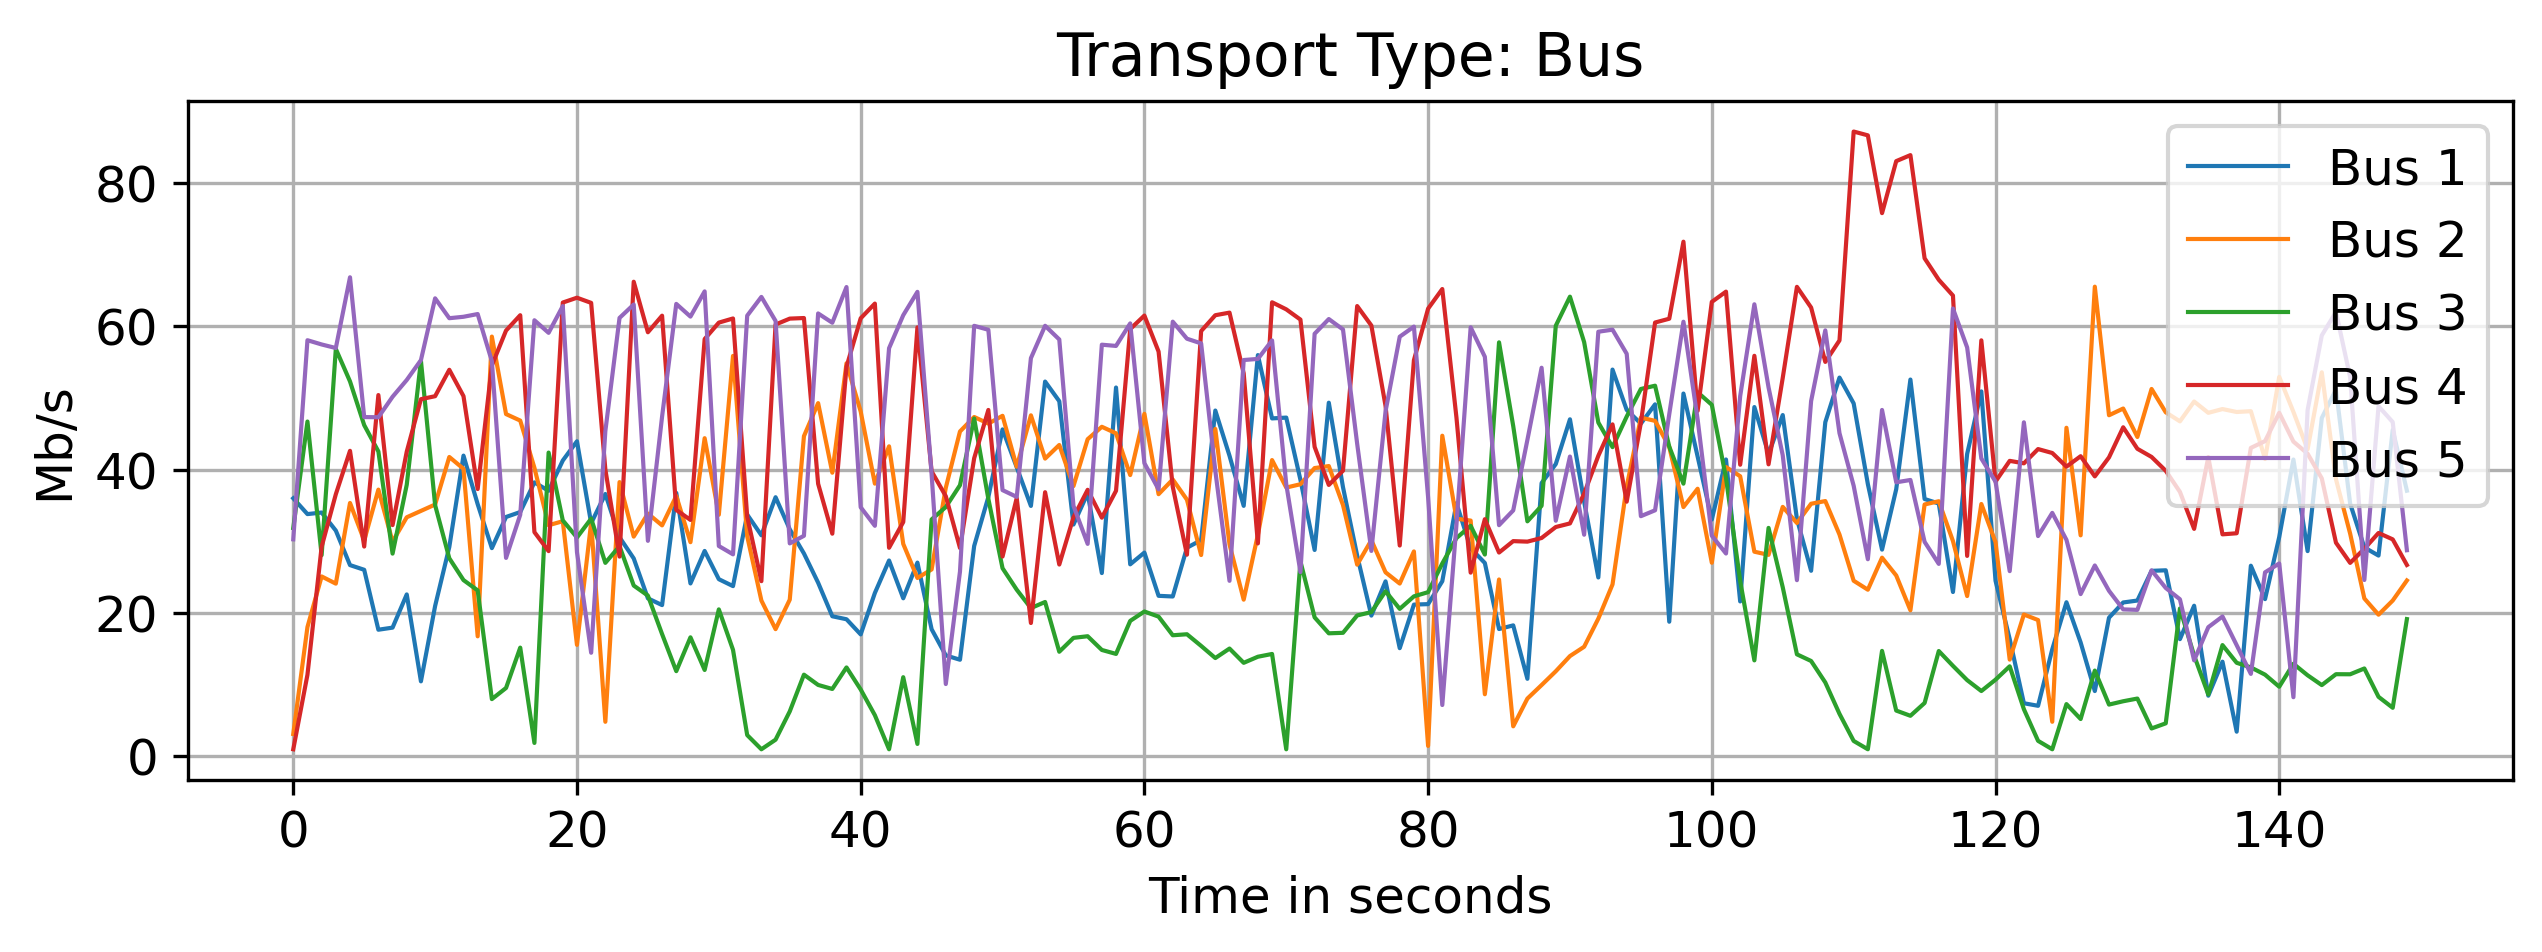

In [15]:
# Load traces.csv and plot the traces
import os
import pandas as pd
import matplotlib.pyplot as plt

log_directory = './traces/'

# Load the CSV data into a DataFrame without specifying column names
df = pd.read_csv('traces.csv', header=None)

x = df.columns.to_numpy()

# Group log files by transport type (e.g., bicycle, bus)
transport_groups = {}
with os.scandir(log_directory) as it:
    for i, entry in enumerate(sorted(it, key=lambda entry: entry.name)):
        transport_type = entry.name.split('_')[1]  # Extract the transport type
        if transport_type not in transport_groups:
            transport_groups[transport_type] = []
        transport_groups[transport_type].append(i + 1)

# Create subplots for each transport category
plt.rcParams['figure.figsize'] = 10, 3
plt.rcParams['figure.dpi'] = 300  # You can adjust this value as needed
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(1, 1, sharex=True)

transport_type = 'bus'
n_traces = 5

indices = transport_groups['bus']
# Max number of traces to plot
indices = indices[:n_traces]

# Capitalize the first letter of the transport type
transport_type = transport_type[0].upper() + transport_type[1:]

for j in range(len(df)):
    if j not in indices:
        continue
    y = df.loc[j].to_numpy()
    # Divide by 1e6 to convert from bits to megabits
    y = y / 1e6
    ax.plot(x, y, label=f'{transport_type} {indices.index(j) + 1}', lw=1)

ax.set_title(f'Transport Type: {transport_type}')
ax.set_ylabel('Mb/s')
ax.grid(True)
ax.legend(loc='upper right')
plt.xlabel('Time in seconds')
plt.grid(True)
plt.show()


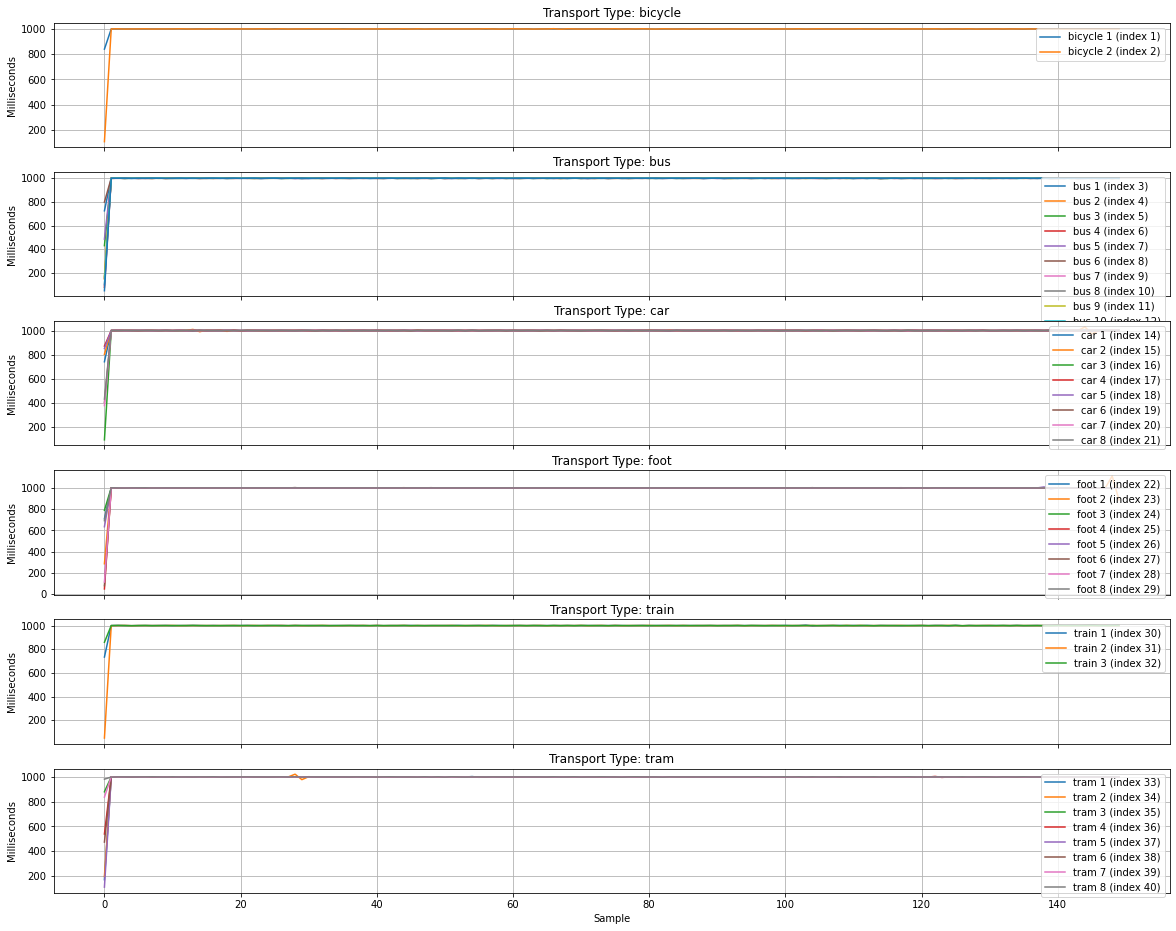

In [2]:
# Load traces.csv and plot the traces
import os
import pandas as pd
import matplotlib.pyplot as plt

log_directory = './traces/'

# Load the CSV data into a DataFrame without specifying column names
df = pd.read_csv('trace_times.csv', header=None)

x = df.columns.to_numpy()

# Create subplots for each transport category
fig, axes = plt.subplots(len(transport_groups), 1, figsize=(20, 16), sharex=True)

# Load and plot data for each transport category
for i, (transport_type, indices) in enumerate(transport_groups.items()):
    for j in range(len(df)):
        if j not in indices:
            continue
        y = df.loc[j].to_numpy()
        axes[i].plot(x, y, label=f'{transport_type} {indices.index(j) + 1} (index {j})')

    axes[i].set_title(f'Transport Type: {transport_type}')
    axes[i].set_ylabel('Milliseconds')
    axes[i].grid(True)
    axes[i].legend(loc='upper right')
plt.xlabel('Sample')
plt.grid(True)
plt.show()
